Library Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

Loading and Exploring Data from Library

In [26]:
digits = load_digits()

In [27]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [22]:
len(digits.data)

1797

In [24]:
len(digits.images)

1797

In [25]:
len(digits.target)

1797

In [6]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

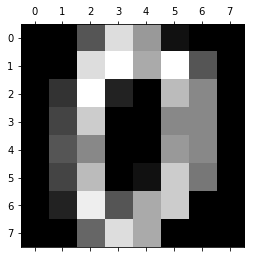

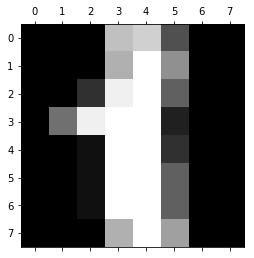

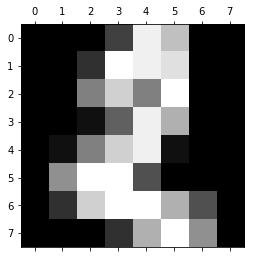

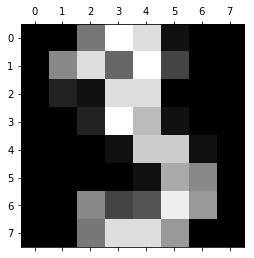

In [7]:
plt.gray()
for i in range(4):
      plt.matshow(digits.images[i])

In [8]:
digits.target[0:4]

array([0, 1, 2, 3])

Model Creation

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(digits.data,digits.target, test_size = 0.2)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [12]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [13]:
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Model Accuracy 

In [14]:
reg.score(X_test,Y_test)

0.95277777777777772

Image we Want to predict

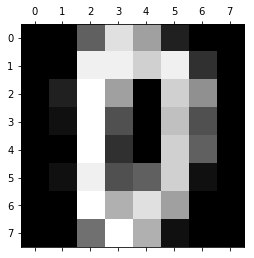

In [15]:
plt.matshow(digits.images[36])

Prediction

In [16]:
reg.predict([digits.data[36]])

array([0])

Check Where our Model Failed

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
Y_predict = reg.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  2,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  1,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]], dtype=int64)

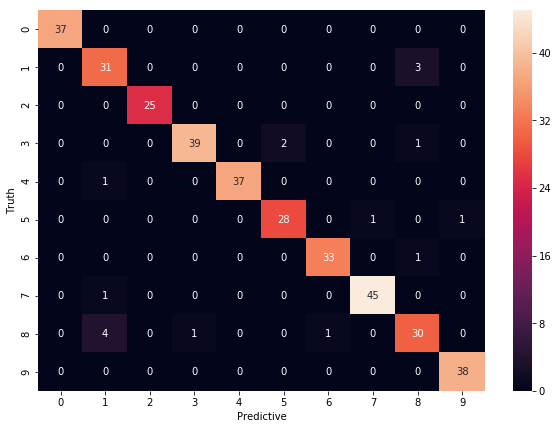

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predictive')
plt.ylabel('Truth')